In [117]:
import pandas as pd 
import numpy as np 
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
df = pd.read_excel('productResult.xlsx')
#df

In [56]:
df.describe()

,Customer_ID,result_rank,Sale_made
count,4.687000e+03,4687.000000,4687.000000
mean,1.344936e+06,4.559633,0.049925
std,7.926258e+05,2.551019,0.217814
min,3.700000e+01,1.000000,0.000000
25%,8.051900e+05,2.000000,0.000000
50%,1.637566e+06,4.000000,0.000000
75%,1.664808e+06,6.000000,0.000000
max,4.062897e+06,12.000000,1.000000


In [57]:
df.sort_values(by='Sale_made',ascending=False)

,Customer_ID,result_rank,provider_Nm,product_name,dummy_quote_value,Sale_made,Sale_source
692,289223,2,Provider A,Product 3160,375.705,1,online
3325,1660594,3,Provider A,Product 552,750.906,1,callcentre
251,1639239,2,Provider B,Product 1412,296.799,1,online
527,268,1,Provider A,Product 3160,1046.96,1,online
3131,1647270,2,Provider A,Product 3160,405.508,1,callcentre
3920,885161,3,Provider A,Product 80,655.556,1,online
242,1632073,1,Provider B,Product 1412,576.972,1,online
4470,1719430,1,Provider A,Product 3160,523.222,1,callcentre
240,288077,10,Provider A,Product 0,5402.13,1,callcentre
828,288725,4,Provider A,Product 56,421.638,1,callcentre


In [58]:
df.groupby('Sale_made').count()
df.keys()

Index(['Customer_ID', 'result_rank', 'provider_Nm', 'product_name',
       'dummy_quote_value', 'Sale_made', 'Sale_source'],
      dtype='object')

# explore the conversion rate
## 1. calculate a general converstion rate 

In [59]:
sales_made = df[df['Sale_made'] ==1]
sales_made['Sale_made'].count()

234

In [60]:
general_CR =sales_made['Sale_made'].count() /  len(df['Customer_ID'])

In [61]:
general_CR

0.049925325368039258

## 2. calculate top 5 prodcut conversion rate

In [62]:
df['product_name'].nunique()

16

In [63]:
product_sele = df[['product_name', 'Sale_made']].groupby('product_name').agg(['count'])
sales_made_byproduct = df[df['Sale_made'] ==1]
sales_made_byproduct[['product_name', 'Sale_made']].groupby('product_name').agg(['count'])

,Sale_made
,count
product_name,
Product 0,7
Product 1412,26
Product 3160,41
Product 3164,11
Product 3292,12
Product 3532,17
Product 552,23
Product 56,43


In [64]:
byproduct_pd = df.groupby('product_name')
product_sale = byproduct_pd['Sale_made'].agg({'occurance':'count', 'sales': 'sum'}).reset_index()

In [65]:
product_sale['CR']=product_sale.apply(lambda row: (row['sales']/ row['occurance']), axis=1)

In [66]:
sorted_productCR = product_sale.sort_values(by='CR',ascending=False)
sorted_productCR

,product_name,occurance,sales,CR
0,Product 0,42,7,0.166667
5,Product 3532,158,17,0.107595
2,Product 3160,428,41,0.095794
13,Product 80,59,5,0.084746
7,Product 56,573,43,0.075044
9,Product 64,295,20,0.067797
10,Product 68,77,5,0.064935
4,Product 3292,201,12,0.059701
1,Product 1412,596,26,0.043624
6,Product 552,599,23,0.038397


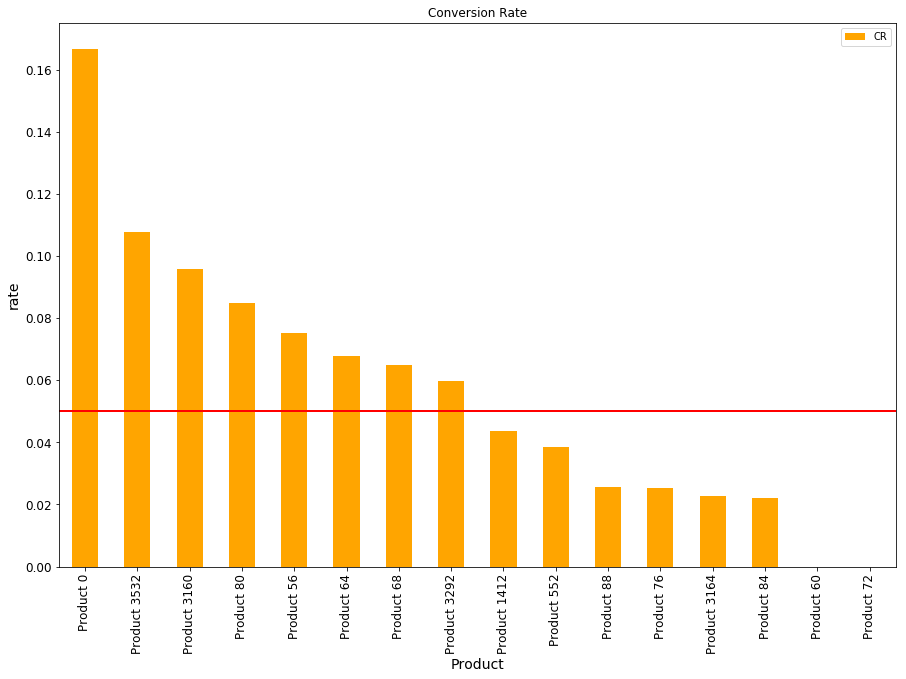

In [118]:
threshold = general_CR
ax = sorted_productCR[['CR']].plot(kind='bar', title ="Conversion Rate",figsize=(15,10),
                                   legend=True, fontsize=12,color = 'orange')
plt.axhline(linewidth=2, color='r',y=threshold)
ax.set_xlabel("Product",fontsize=14)
ax.set_ylabel("rate",fontsize=14)
ax.set_xticklabels(sorted_productCR['product_name'])
plt.show()

In [68]:
sorted_productSales = product_sale.sort_values(by='sales',ascending=False)
Sales = sorted_productSales['sales'].mean()
Sales

14.625

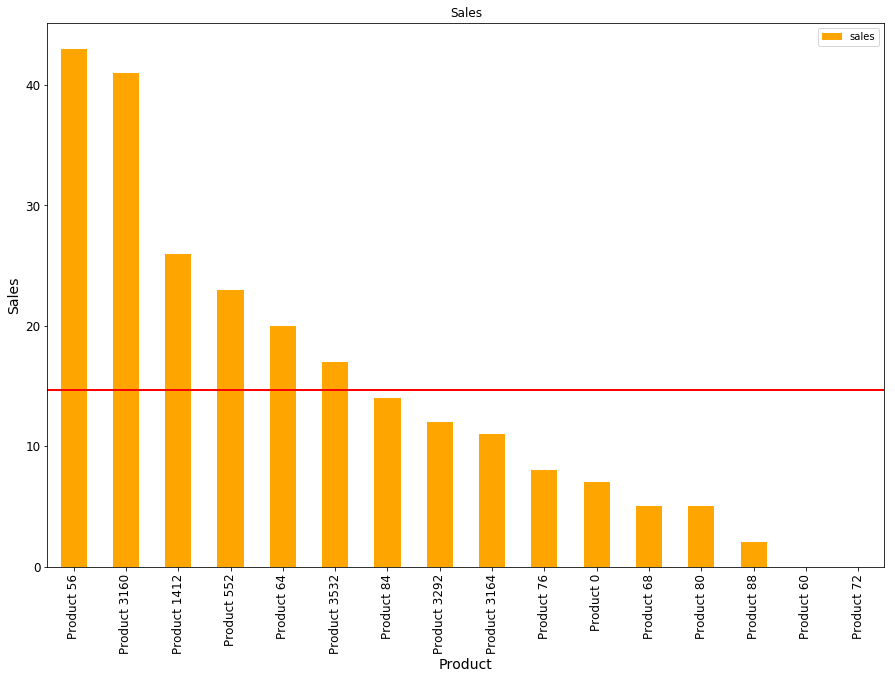

In [102]:
threshold = Sales

ax = sorted_productSales[['sales']].plot(kind='bar', title ="Sales",figsize=(15,10),
                                   legend=True, fontsize=12,color = 'orange')
plt.axhline(linewidth=2, color='r',y=threshold)
ax.set_xlabel("Product",fontsize=14)
ax.set_ylabel("Sales",fontsize=14)
ax.set_xticklabels(sorted_productSales['product_name'])
plt.show()

## 3. calculate conversion rate by different source (callcenter / online) => wrong 

In [70]:
#no sales was made when the sale_source is null 
#df_fillnull = df.fillna('missing')
#df_fillnull
bysource_pd = df.groupby('Sale_source')
bysource_pd_sale = bysource_pd['Sale_made'].agg({'sales': 'sum'}).reset_index()
bysource_pd_sale

,Sale_source,sales
0,callcentre,113
1,online,121


In [71]:
bysource_pd_sale['Precentage']=bysource_pd_sale.apply(lambda row: (row['sales']/234), axis=1)

In [72]:
bysource_pd_sale

,Sale_source,sales,Precentage
0,callcentre,113,0.482906
1,online,121,0.517094


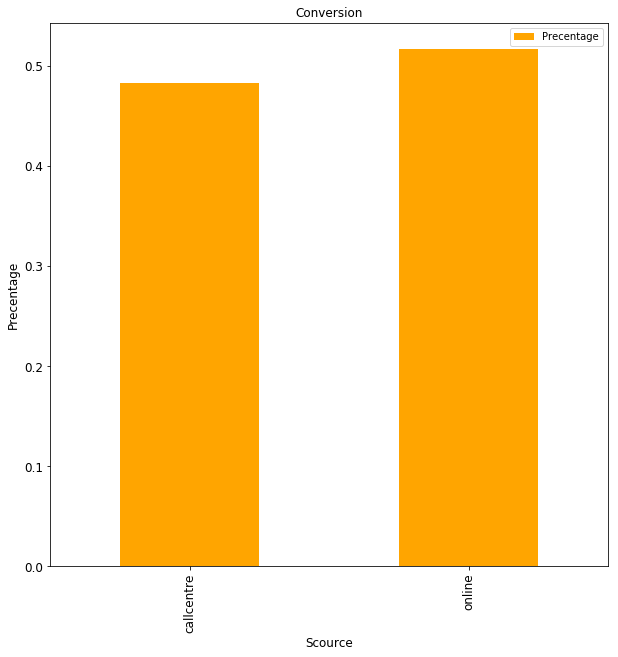

In [73]:
ax = bysource_pd_sale[['Precentage']].plot(kind='bar', title ="Conversion",figsize=(10,10),legend=True, fontsize=12,color = 'orange')
#plt.axhline(linewidth=2, color='r',y=threshold)
ax.set_xlabel("Scource",fontsize=12)
ax.set_ylabel("Precentage",fontsize=12)
ax.set_xticklabels(bysource_pd_sale['Sale_source'])
plt.show()

## 4. calculate conversion rate by # prodcut recommended

Find the relationship between the #of prodcut system recommend to user, and the user actually brought the product 

In [74]:
#product_sele = df[['product_name', 'Sale_made','Customer_ID']].groupby('Customer_ID').agg(['count'])
#df['Customer_ID'].nunique()
bycustomer_pd = df.groupby('Customer_ID')
bycustomer_sale = bycustomer_pd['Sale_made'].agg({'occurance':'count', 'sales': 'sum'}).reset_index()
#bycustomer_sale['occurance'] = bycustomer_sale.apply(lambda row: row['occurance']/2 if row['occurance']>12 else row['occurance'], axis=1)
bycustomer_sale['CR']=bycustomer_sale.apply(lambda row: (row['sales']/ row['occurance']), axis=1)
#bycustomer_sale['customer']=bycustomer_sale['Customer_ID'].agg({'count'})

#customer_ID 1661666, 1685822 is return user, the single max recommend product cannot exceed 12
#manually set the value for correct plot 
bycustomer_sale.occurance[bycustomer_sale.occurance==16] = 8
bycustomer_sale.occurance[bycustomer_sale.occurance==14.0] = 7
bycustomer_sale['sales'][448] =1
bycustomer_sale['sales'][594] =2

bycustomer_sale = bycustomer_sale.sort_values(by='occurance',ascending=False)
bycustomer_sale

/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Applications/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be s

,Customer_ID,occurance,sales,CR
435,1659907,12,0,0.000000
496,1668648,12,0,0.000000
478,1665782,12,0,0.000000
145,289223,12,2,0.166667
315,1637948,12,0,0.000000
136,288778,12,0,0.000000
15,260,12,2,0.166667
337,1641827,12,0,0.000000
571,1681291,12,1,0.083333
273,1629520,12,1,0.083333


In [75]:
#add customer weight 

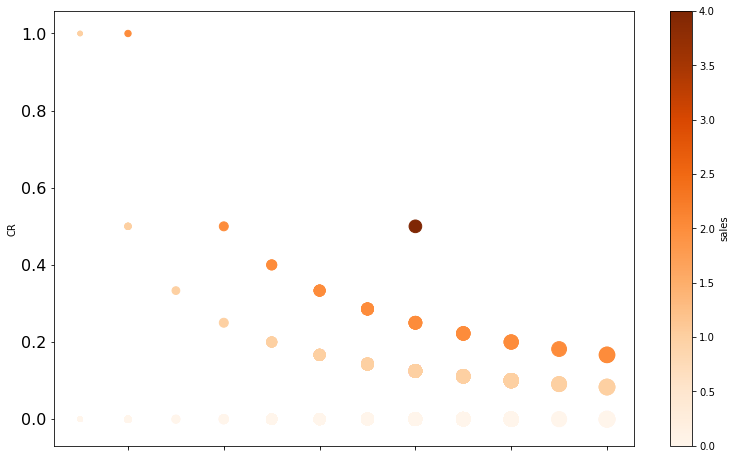

In [125]:
#s=bycustomer_sale['sales']*200,
ax = bycustomer_sale.plot(kind='scatter', x='occurance', y='CR', c='sales',s=bycustomer_sale['occurance']*20,
                     figsize=(13,8), cmap='Oranges',fontsize=16);
ax.set_xlabel("Number of product ")

#bycustomer_sale.plot(kind='scatter', x='occurance', y='CR',s=bycustomer_sale['sales']*20,figsize=(13,8),color="Orange");

In [83]:
bycustomer_sale[bycustomer_sale['sales']==4]

,Customer_ID,occurance,sales,CR
10,234,8,4,0.5


## 4. calculate conversion rate by different source (callcenter / online)

Check weather there is a relationship btw ranking and CR 

In [84]:
byrank_pd = df.groupby('result_rank')
byrank_sale = byrank_pd['Sale_made'].agg({'occurance':'count', 'sales': 'sum'}).reset_index()
byrank_sale['CR']=byrank_sale.apply(lambda row: (row['sales']/ row['occurance']), axis=1)
byrank_sale = byrank_sale.sort_values(by='occurance',ascending=False)
byrank_sale

,result_rank,occurance,sales,CR
0,1,630,80,0.126984
1,2,613,48,0.078303
2,3,591,28,0.047377
3,4,587,29,0.049404
4,5,579,17,0.029361
5,6,542,10,0.018450
6,7,448,9,0.020089
7,8,360,7,0.019444
8,9,181,1,0.005525
9,10,126,5,0.039683


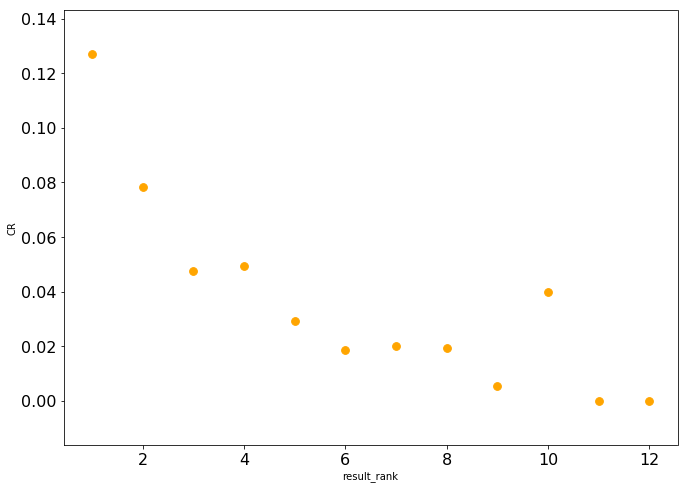

In [120]:
#byrank_sale.plot(kind='scatter', x='result_rank', y='CR', c='sales',
                   #  figsize=(13,8),s=bycustomer_sale['sales']*200, cmap='Oranges');
byrank_sale.plot(kind='scatter', x='result_rank', y='CR',figsize=(11,8),color="Orange",s=[60],fontsize=16);


# Explore diff btw online and call-centre

## 1. product rank / price 

In [112]:
callcentre = df[df['Sale_source'] == 'callcentre']
callcentre = callcentre.sort_values(by='result_rank',ascending=False)
callcentre_value['result_rank'].mean()

3.544642857142857

In [154]:
callcentre_value =callcentre[callcentre['dummy_quote_value'] !='MISSING']
callcentre_value['dummy_quote_value'].mean()
#callcentre_value

810.890540181387

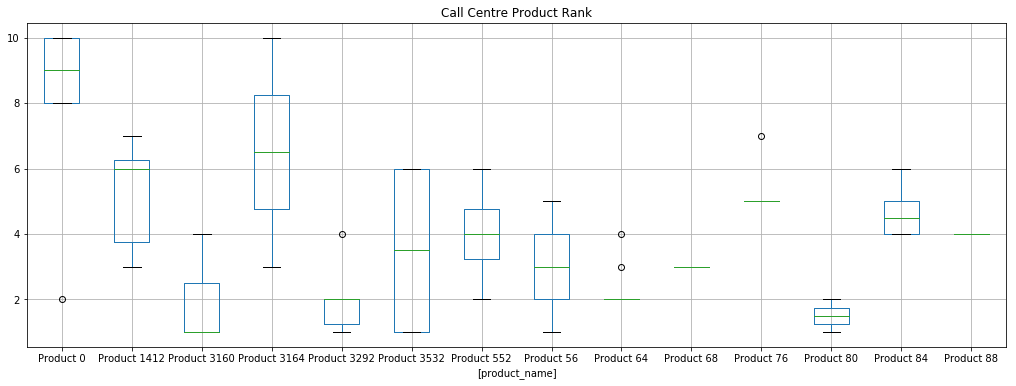

In [155]:
callcentre.boxplot(column=['result_rank'], by=['product_name'],figsize=(17,6))
plt.title("Call Centre Product Rank")
plt.suptitle("")

/Applications/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2440: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


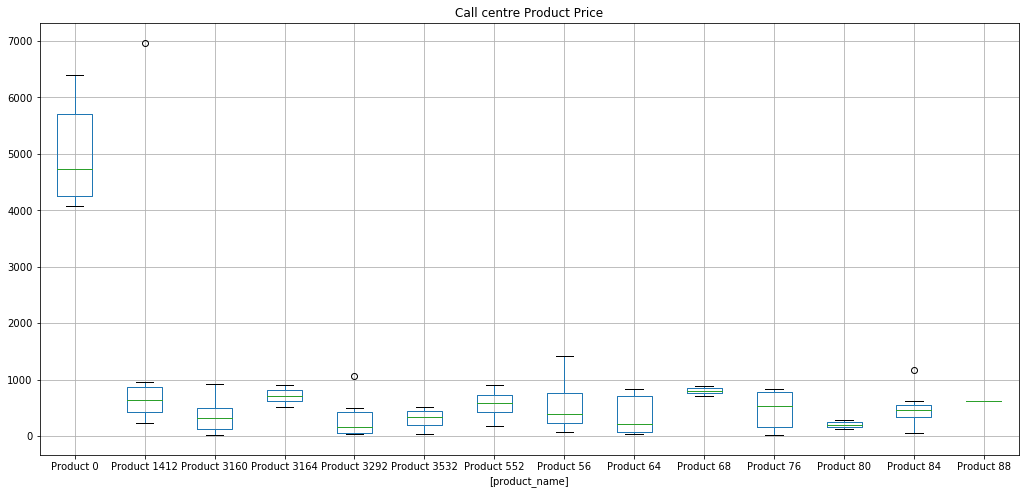

In [158]:
callcentre_value[['dummy_quote_value']] = callcentre_value[['dummy_quote_value']].apply(pd.to_numeric)
callcentre_value.boxplot(column=['dummy_quote_value'], by=['product_name'],figsize=(17,8))
plt.title("Call centre Product Price")
plt.suptitle("")

In [128]:
online = df[df['Sale_source'] == 'online']
online = online.sort_values(by='result_rank',ascending=False)
online['result_rank'].mean()


2.4710743801652892

In [129]:
online_value =online[online['dummy_quote_value'] !='MISSING']
online_value['dummy_quote_value'].mean()

448.6923290320716

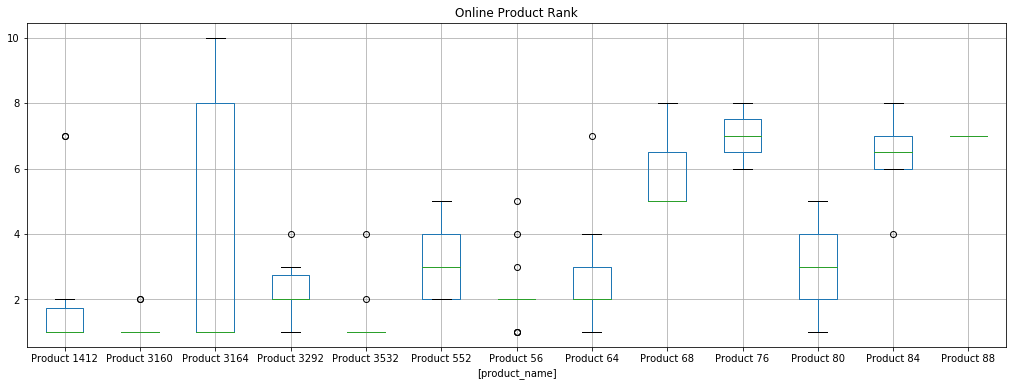

In [151]:
online.boxplot(column=['result_rank'], by=['product_name'],figsize=(17,6))
plt.title("Online Product Rank")
plt.suptitle("")

/Applications/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2440: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


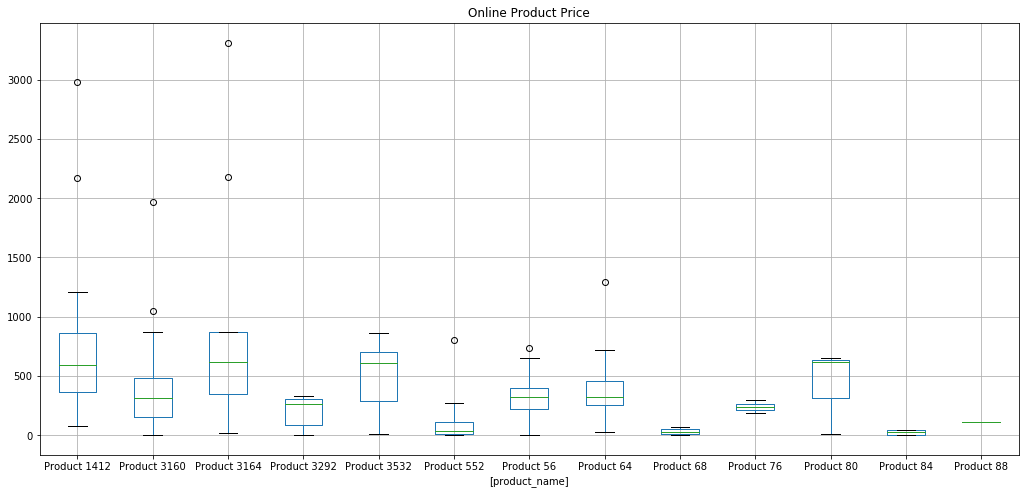

In [157]:
online_value[['dummy_quote_value']] = online_value[['dummy_quote_value']].apply(pd.to_numeric)
online_value.boxplot(column=['dummy_quote_value'], by=['product_name'],figsize=(17,8))
plt.title("Online Product Price")
plt.suptitle("")

## 2. Throught which channel customer buy more?customer loyalty

In [388]:
bysource_diff = df.groupby('Sale_source')
bysource_diff = bysource_diff['Customer_ID'].agg({'Sales': 'count','customer':'nunique'}).reset_index()
#bysource_diff = bysource_diff['product_name'].agg({'product': 'count'}).reset_index()
bysource_diff['density']=bysource_diff.apply(lambda row: (row['Sales']/ row['customer']), axis=1)
bysource_diff

,Sale_source,Sales,customer,density
0,callcentre,113,98,1.153061
1,online,121,113,1.070796


In [346]:
bysource_diff2 = df.groupby('Sale_source')


## 3. Who offer more choice # of product for each customer 

# metric

In [5]:
#,'dummy_quote_value'
sorted_prodcut = df.sort_values(['Customer_ID','result_rank'],ascending=True)

In [6]:
sorted_prodcut =sorted_prodcut[sorted_prodcut['dummy_quote_value'] !='MISSING']
sorted_prodcut
 #df.plot(kind='scatter', x='a', y='b', s=df['c']*200);

,Customer_ID,result_rank,provider_Nm,product_name,dummy_quote_value,Sale_made,Sale_source
0,37,1,Provider A,Product 64,377.089,0,NaN
1,37,2,Provider A,Product 3160,60.4049,0,NaN
2,37,3,Provider A,Product 56,309.119,0,NaN
3,37,4,Provider A,Product 552,224.304,0,NaN
4,37,5,Provider A,Product 3292,79.1503,0,NaN
5,37,6,Provider A,Product 76,401.601,0,NaN
3447,37,7,Provider B,Product 1412,263.217,0,NaN
6,37,8,Provider A,Product 84,525.587,0,NaN
3448,37,9,Provider B,Product 3164,556.828,0,NaN
7,57,1,Provider A,Product 56,229.212,0,NaN


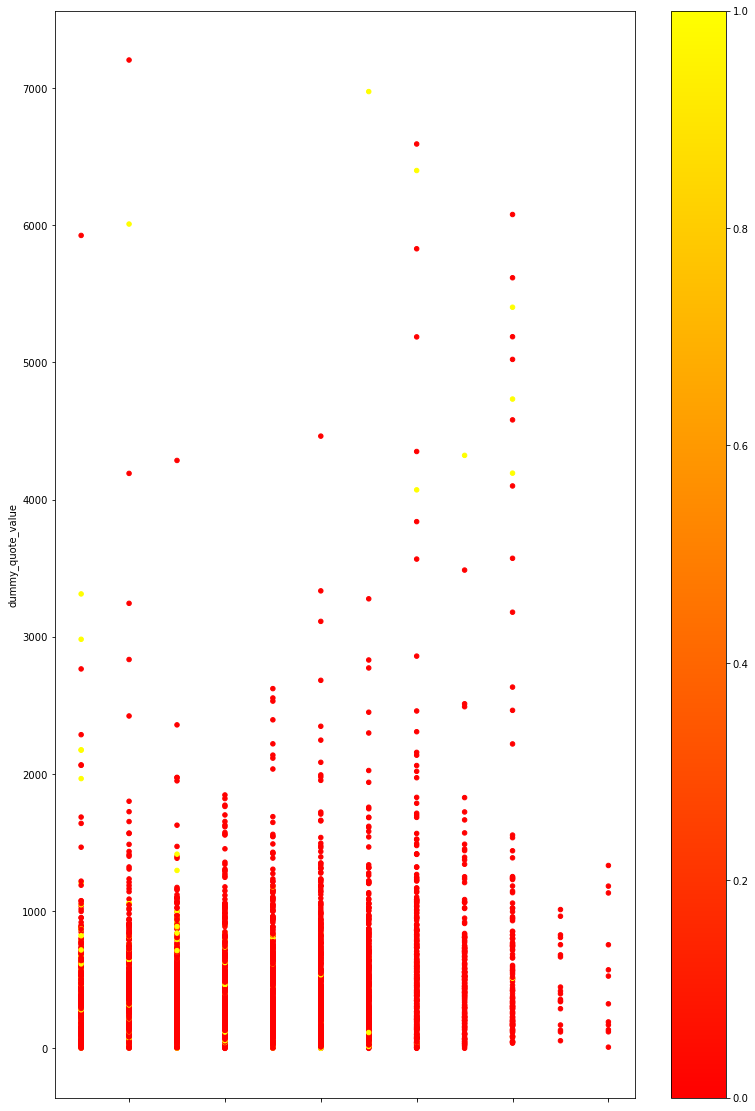

In [413]:
sorted_prodcut.plot(kind='scatter', x='result_rank', y='dummy_quote_value',figsize=(13,20),
                    c=sorted_prodcut['Sale_made'], cmap=plt.cm.autumn)

In [415]:
 df[df['provider_Nm']=='Provider A'].count()

Customer_ID          3447
result_rank          3447
provider_Nm          3447
product_name         3447
dummy_quote_value    3447
Sale_made            3447
Sale_source           180
dtype: int64

In [416]:
 df[df['provider_Nm']=='Provider B'].count()

Customer_ID          1240
result_rank          1240
provider_Nm          1240
product_name         1240
dummy_quote_value    1240
Sale_made            1240
Sale_source            54
dtype: int64

In [418]:
df2= df[df['provider_Nm']=='Provider A']
df2['product_name'].nunique()

13

In [419]:
df2= df[df['provider_Nm']=='Provider B']
df2['product_name'].nunique()

3

In [420]:
df['product_name'].nunique()

16